In [8]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:

from keras.layers.normalization import BatchNormalization

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2758 - acc: 0.9148 - val_loss: 0.0579 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0915 - acc: 0.9730 - val_loss: 0.0412 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0676 - acc: 0.9805 - val_loss: 0.0337 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0553 - acc: 0.9839 - val_loss: 0.0321 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0473 - acc: 0.9858 - val_loss: 0.0301 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0421 - acc: 0.9872 - val_loss: 0.0264 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0369 - acc: 0.9889 - val_loss: 0.0297 - 

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
nb_epoch = 12

## Loss v/s Epoch Curve

Test loss: 0.028261024607434047
Test accuracy: 0.9919


<IPython.core.display.Javascript object>


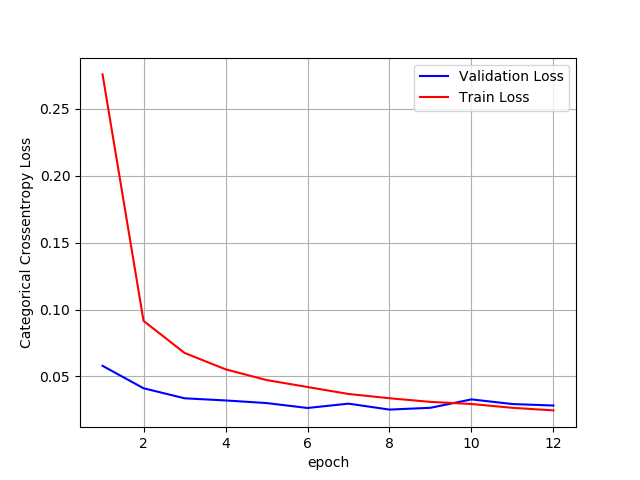

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Summary
## We get a test accuracy of 99.19% with kernel of size 3X3 with activation function relu.

# MNIST with 3 different ConvNets

# 1. with 3 Conv layers

## A. Without Dropout Rate, Without Batch Normalization Layer,Without Max Pooling

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(Conv2D(8, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 90s 2ms/step - loss: 0.2070 - acc: 0.9370 - val_loss: 0.0685 - val_acc: 0.9768
Epoch 2/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0528 - acc: 0.9838 - val_loss: 0.0397 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0336 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0204 - acc: 0.9936 - val_loss: 0.0356 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0385 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0080 - acc: 0.9975 - val_loss: 0.0446 - val_acc: 0.9879
Epoch 7/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0061 - acc: 0.9981 - val_loss: 0.0462 - val_acc

Test loss: 0.05648152156051851
Test accuracy: 0.9884


<IPython.core.display.Javascript object>


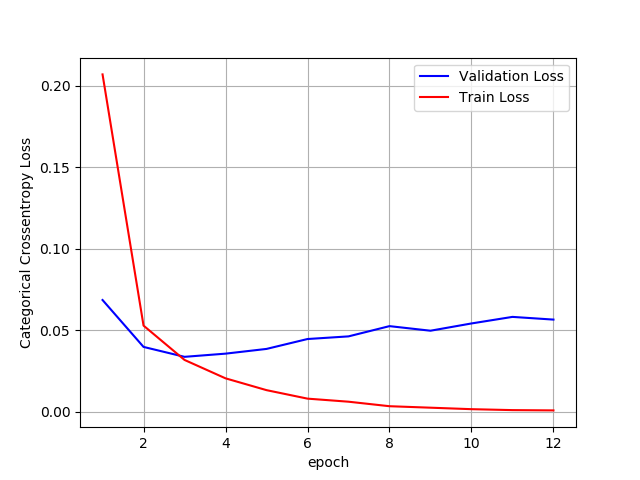

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.84% with kernel of size 3X3 with activation function relu. Without using Dropout rate, Batch Normalization and Max Pooling

## B. With Dropout Rate, With Batch Normalization Layer,Without Max Pooling

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 261s 4ms/step - loss: 0.2552 - acc: 0.9214 - val_loss: 0.0658 - val_acc: 0.9785
Epoch 2/12
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0821 - acc: 0.9746 - val_loss: 0.0383 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 278s 5ms/step - loss: 0.0577 - acc: 0.9825 - val_loss: 0.0375 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0452 - acc: 0.9859 - val_loss: 0.0336 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0386 - acc: 0.9882 - val_loss: 0.0296 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 278s 5ms/step - loss: 0.0344 - acc: 0.9896 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0299 - acc: 0.9902 - val_loss: 0.0309 - 

Test loss: 0.02856587247369321
Test accuracy: 0.9916


<IPython.core.display.Javascript object>


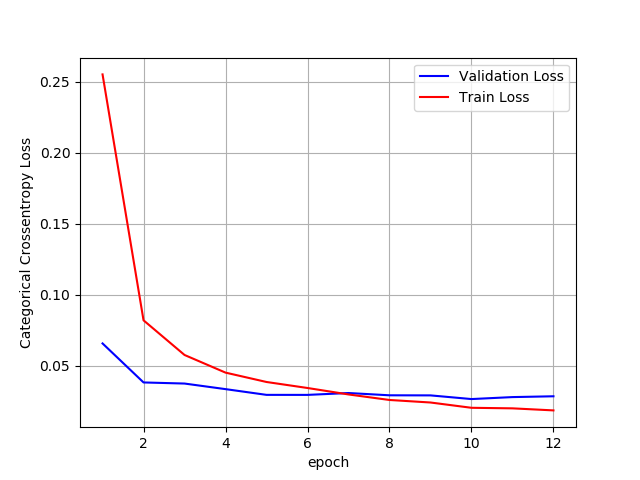

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 99.16% with kernel of size 3X3 with activation function relu, using Dropout rate and Batch Normalization.

## C. Without Dropout Rate, With Batch Normalization Layer,With Max Pooling

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 56s 939us/step - loss: 0.5327 - acc: 0.8390 - val_loss: 0.1593 - val_acc: 0.9474
Epoch 2/12
60000/60000 [==============================] - 54s 894us/step - loss: 0.1712 - acc: 0.9487 - val_loss: 0.1056 - val_acc: 0.9676
Epoch 3/12
60000/60000 [==============================] - 53s 877us/step - loss: 0.1305 - acc: 0.9616 - val_loss: 0.0952 - val_acc: 0.9721
Epoch 4/12
60000/60000 [==============================] - 52s 870us/step - loss: 0.1076 - acc: 0.9671 - val_loss: 0.1194 - val_acc: 0.9636
Epoch 5/12
60000/60000 [==============================] - 52s 861us/step - loss: 0.0951 - acc: 0.9718 - val_loss: 0.0848 - val_acc: 0.9765
Epoch 6/12
60000/60000 [==============================] - 52s 872us/step - loss: 0.0871 - acc: 0.9744 - val_loss: 0.0850 - val_acc: 0.9762
Epoch 7/12
60000/60000 [==============================] - 53s 883us/step - loss: 0.0798 - acc: 0.9760 - val_loss: 0.

Test loss: 0.07345019727027975
Test accuracy: 0.9805


<IPython.core.display.Javascript object>


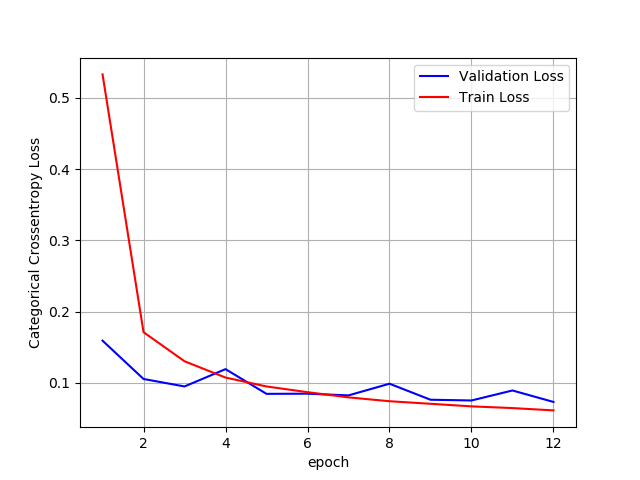

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.05% with kernel of size 3X3 with activation function relu, using batch Normalization and Max pooling

## D. With Dropout Rate, Without Batch Normalization Layer,With Max Pooling

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.65))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.85))
model.add(Dense(num_classes, activation='softmax'))


In [25]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 566us/step - loss: 2.3041 - acc: 0.1201 - val_loss: 2.2921 - val_acc: 0.1199
Epoch 2/12
60000/60000 [==============================] - 33s 554us/step - loss: 2.2150 - acc: 0.1856 - val_loss: 2.0530 - val_acc: 0.3408
Epoch 3/12
60000/60000 [==============================] - 33s 552us/step - loss: 2.0901 - acc: 0.2322 - val_loss: 1.9222 - val_acc: 0.3847
Epoch 4/12
60000/60000 [==============================] - 32s 541us/step - loss: 2.0205 - acc: 0.2502 - val_loss: 1.8366 - val_acc: 0.3960
Epoch 5/12
60000/60000 [==============================] - 34s 560us/step - loss: 1.9793 - acc: 0.2664 - val_loss: 1.7802 - val_acc: 0.4108
Epoch 6/12
60000/60000 [==============================] - 33s 547us/step - loss: 1.9489 - acc: 0.2738 - val_loss: 1.7318 - val_acc: 0.3924
Epoch 7/12
60000/60000 [==============================] - 34s 565us/step - loss: 1.9312 - acc: 0.2818 - val_loss: 1.

Test loss: 1.6028395317077637
Test accuracy: 0.4047


<IPython.core.display.Javascript object>


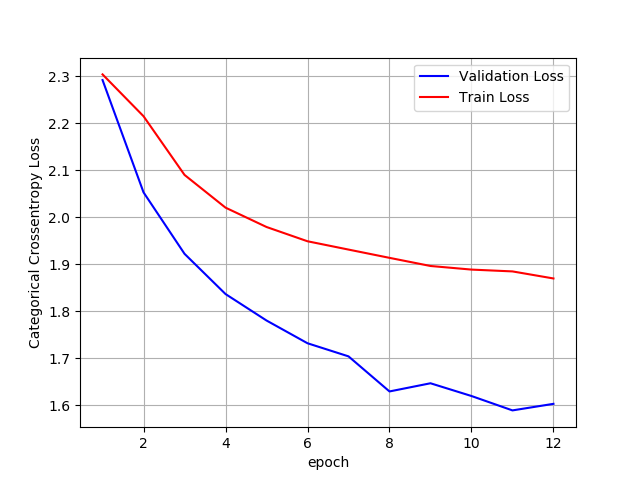

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 88.87% with kernel of size 3X3 with activation function relu, using Dropout rate, and Max Pooling.

## E. With Dropout Rate, With Batch Normalization Layer,With Max Pooling

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.85))
model.add(Dense(num_classes, activation='softmax'))


In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 64s 1ms/step - loss: 3.1330 - acc: 0.1272 - val_loss: 2.0979 - val_acc: 0.2927
Epoch 2/12
60000/60000 [==============================] - 59s 991us/step - loss: 2.0804 - acc: 0.2187 - val_loss: 1.6575 - val_acc: 0.4835
Epoch 3/12
60000/60000 [==============================] - 59s 983us/step - loss: 1.8626 - acc: 0.2639 - val_loss: 1.4195 - val_acc: 0.4724
Epoch 4/12
60000/60000 [==============================] - 57s 949us/step - loss: 1.7736 - acc: 0.2778 - val_loss: 1.3229 - val_acc: 0.5182
Epoch 5/12
60000/60000 [==============================] - 56s 926us/step - loss: 1.7192 - acc: 0.2875 - val_loss: 1.2403 - val_acc: 0.4796
Epoch 6/12
60000/60000 [==============================] - 57s 943us/step - loss: 1.6870 - acc: 0.2889 - val_loss: 1.2152 - val_acc: 0.4956
Epoch 7/12
60000/60000 [==============================] - 58s 968us/step - loss: 1.6759 - acc: 0.2896 - val_loss: 1.24

Test loss: 1.1588219144821168
Test accuracy: 0.4922


<IPython.core.display.Javascript object>


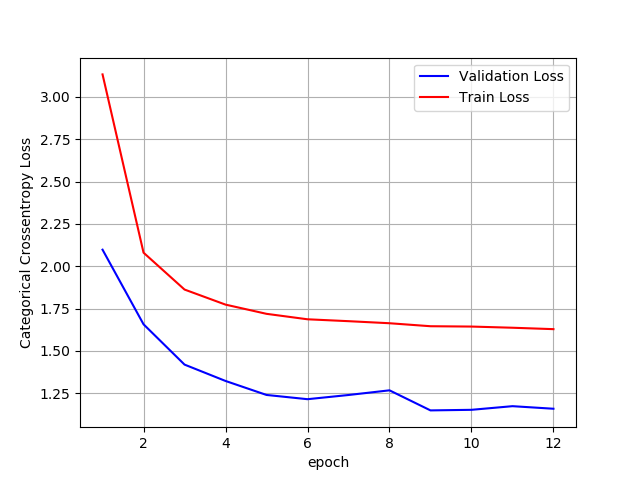

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 89.22% with kernel of size 3X3 with activation function relu, using Dropout rate, Batch Noramalization and Max Pooling.

## Pretty table

In [77]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "Dropout_Layer", "Batch_Normalization","Max-Pooling" "Accuracy"]
x.add_row(["MLP","No", "No","No" 98.84])
x.add_row(["MLP","Yes", "Yes","No", 99.16])
x.add_row(["MLP","No", "Yes","Yes" 98.05])
x.add_row(["MLP","Yes", "No","Yes", 88.87])
x.add_row(["MLP","Yes", "Yes","Yes", 89.22])
print(x)

SyntaxError: invalid syntax (<ipython-input-77-0b79784ce2b4>, line 5)

# 2. with 5 Conv layers

## A. Without Dropout Rate, Without Batch Normalization Layer,Without Max Pooling

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.65))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_27 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 2,361,546
Trainable params: 2,361,546
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.5413 - acc: 0.8326 - val_loss: 0.1246 - val_acc: 0.9632
Epoch 2/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2862 - acc: 0.9171 - val_loss: 0.0890 - val_acc: 0.9738
Epoch 3/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2372 - acc: 0.9317 - val_loss: 0.0787 - val_acc: 0.9768
Epoch 4/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2136 - acc: 0.9389 - val_loss: 0.0737 - val_acc: 0.9769
Epoch 5/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1963 - acc: 0.9443 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 6/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1883 - acc: 0.9460 - val_loss: 0.0628 - val_acc: 0.9815
Epoch 7/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1851 - acc: 0.9486 - val_loss: 0.0607 - val_acc

Test loss: 0.053843903587176466
Test accuracy: 0.9823


<IPython.core.display.Javascript object>


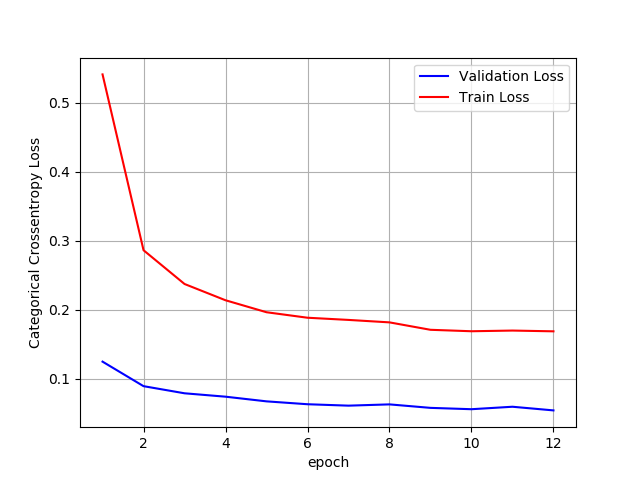

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.23% with kernel of size 5X5 with activation function relu.

In [46]:
epochs = 12

## B. With Dropout Rate, With Batch Normalization Layer,Without Max Pooling

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_34 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total para

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 138s 2ms/step - loss: 0.7172 - acc: 0.7743 - val_loss: 0.1336 - val_acc: 0.9654
Epoch 2/8
60000/60000 [==============================] - 137s 2ms/step - loss: 0.3267 - acc: 0.9028 - val_loss: 0.0922 - val_acc: 0.9739
Epoch 3/8
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2748 - acc: 0.9215 - val_loss: 0.0818 - val_acc: 0.9793
Epoch 4/8
60000/60000 [==============================] - 142s 2ms/step - loss: 0.2519 - acc: 0.9288 - val_loss: 0.0856 - val_acc: 0.9774
Epoch 5/8
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2285 - acc: 0.9348 - val_loss: 0.0818 - val_acc: 0.9800
Epoch 6/8
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2219 - acc: 0.9372 - val_loss: 0.0852 - val_acc: 0.9808
Epoch 7/8
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2199 - acc: 0.9385 - val_loss: 0.0770 - val_acc

### Summary

#### We get a test accuracy of 98.1% with kernel of size 5X5 with activation function relu,using Dropout rate, and Batch Noramalization.

## C. Without Dropout Rate, With Batch Normalization Layer,With Max Pooling

In [47]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
flatten_15 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total para

In [48]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 45s 758us/step - loss: 0.5724 - acc: 0.8170 - val_loss: 0.1018 - val_acc: 0.9727
Epoch 2/12
60000/60000 [==============================] - 45s 747us/step - loss: 0.2428 - acc: 0.9269 - val_loss: 0.0659 - val_acc: 0.9805
Epoch 3/12
60000/60000 [==============================] - 46s 768us/step - loss: 0.1897 - acc: 0.9439 - val_loss: 0.0549 - val_acc: 0.9840
Epoch 4/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.1650 - acc: 0.9519 - val_loss: 0.0543 - val_acc: 0.9861
Epoch 5/12
60000/60000 [==============================] - 44s 740us/step - loss: 0.1551 - acc: 0.9542 - val_loss: 0.0560 - val_acc: 0.9860
Epoch 6/12
60000/60000 [==============================] - 46s 762us/step - loss: 0.1432 - acc: 0.9594 - val_loss: 0.0562 - val_acc: 0.9854
Epoch 7/12
60000/60000 [==============================] - 46s 760us/step - loss: 0.1344 - acc: 0.9614 - val_loss: 0.

Test loss: 0.07065389613017155
Test accuracy: 0.984


<IPython.core.display.Javascript object>


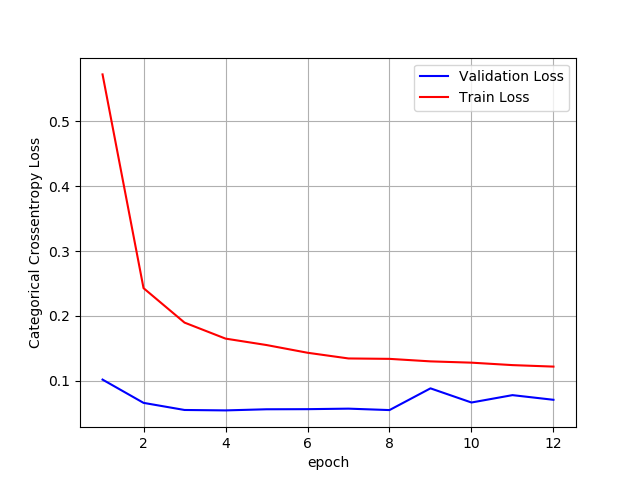

In [49]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.4% with kernel of size 5X5 with activation function relu, with batch normalization and Max pooling.

## D. With Dropout Rate, Without Batch Normalization Layer,With Max Pooling

In [50]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

model.add(Conv2D(28, (5, 5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 12, 12, 28)        22428     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 28)          0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1008)              0         
__________

In [51]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 61s 1ms/step - loss: 1.1330 - acc: 0.6068 - val_loss: 0.2042 - val_acc: 0.9484
Epoch 2/12
60000/60000 [==============================] - 59s 988us/step - loss: 0.5190 - acc: 0.8377 - val_loss: 0.1251 - val_acc: 0.9643
Epoch 3/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.4069 - acc: 0.8758 - val_loss: 0.0959 - val_acc: 0.9702
Epoch 4/12
60000/60000 [==============================] - 59s 990us/step - loss: 0.3536 - acc: 0.8936 - val_loss: 0.0848 - val_acc: 0.9739
Epoch 5/12
60000/60000 [==============================] - 60s 993us/step - loss: 0.3235 - acc: 0.9056 - val_loss: 0.0763 - val_acc: 0.9765
Epoch 6/12
60000/60000 [==============================] - 59s 985us/step - loss: 0.2996 - acc: 0.9118 - val_loss: 0.0703 - val_acc: 0.9779
Epoch 7/12
60000/60000 [==============================] - 59s 988us/step - loss: 0.2870 - acc: 0.9177 - val_loss: 0.0655

Test loss: 0.07308760028518736
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


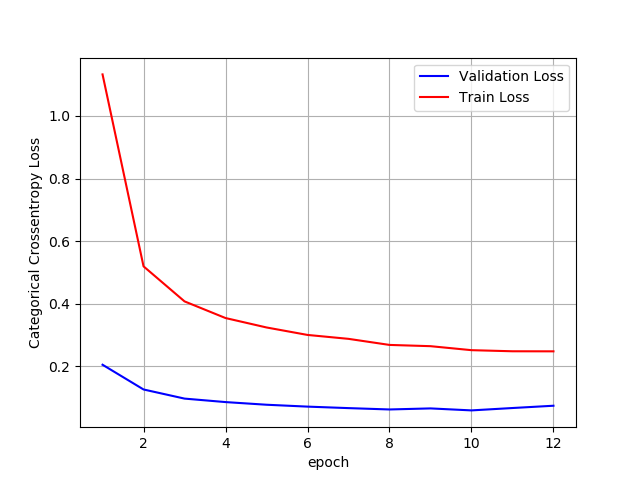

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.26% with kernel of size 5X5 with activation function relu, using Dropout and Max pooling

## E. With Dropout Rate, With Batch Normalization Layer,With Max Pooling

In [53]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.85))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 6, 6, 64)          0         
__________

In [54]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 96s 2ms/step - loss: 2.3581 - acc: 0.1587 - val_loss: 1.5127 - val_acc: 0.7292
Epoch 2/12
60000/60000 [==============================] - 92s 2ms/step - loss: 1.4058 - acc: 0.4909 - val_loss: 0.4236 - val_acc: 0.9348
Epoch 3/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.7777 - acc: 0.7450 - val_loss: 0.2225 - val_acc: 0.9544
Epoch 4/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.5586 - acc: 0.8265 - val_loss: 0.1467 - val_acc: 0.9587
Epoch 5/12
60000/60000 [==============================] - 92s 2ms/step - loss: 0.4594 - acc: 0.8628 - val_loss: 0.1039 - val_acc: 0.9703
Epoch 6/12
60000/60000 [==============================] - 90s 2ms/step - loss: 0.4039 - acc: 0.8817 - val_loss: 0.1143 - val_acc: 0.9692
Epoch 7/12
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3680 - acc: 0.8940 - val_loss: 0.0877 - val_acc

Test loss: 0.07987095427624881
Test accuracy: 0.9786


<IPython.core.display.Javascript object>


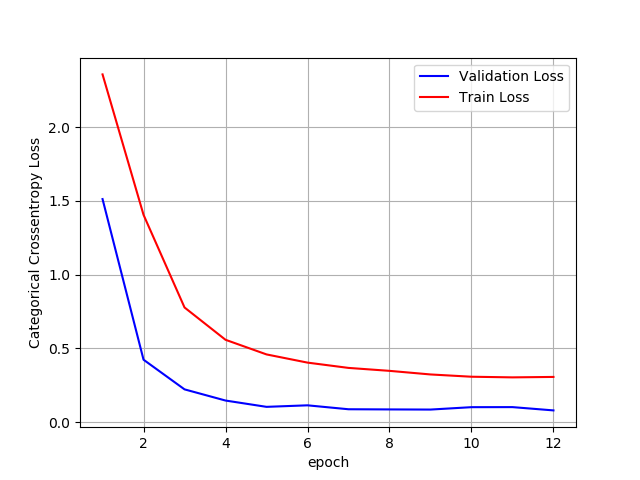

In [55]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 97.86% with kernel of size 5X5 with activation function relu and 5 convulutional layer

## Pretty Table

In [ ]:

x.field_names = ["Model", "Dropout_Layer", "Batch_Normalization","Max-Pooling" "Accuracy"]
x.add_row(["MLP","No", "No","No" 98.23])
x.add_row(["MLP","Yes", "Yes","No", 98.1])
x.add_row(["MLP","No", "Yes","Yes" 98.4])
x.add_row(["MLP","Yes", "No","Yes", 98.26])
x.add_row(["MLP","Yes", "Yes","Yes", 92.86])
print(x)

# 3. with 7 Conv layers

## A. Without Dropout Rate, Without Batch Normalization Layer,Without Max Pooling

In [60]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (2, 2),padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 27, 27, 64)        8256      
_________________________________________________________________
flatten_20 (Flatten)         (None, 46656)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               5972096   
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1290      
Total params: 5,981,802
Trainable params: 5,981,802
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 196s 3ms/step - loss: 0.6067 - acc: 0.8042 - val_loss: 0.1143 - val_acc: 0.9651
Epoch 2/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2817 - acc: 0.9158 - val_loss: 0.0799 - val_acc: 0.9760
Epoch 3/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.2240 - acc: 0.9322 - val_loss: 0.0700 - val_acc: 0.9775
Epoch 4/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1952 - acc: 0.9411 - val_loss: 0.0644 - val_acc: 0.9794
Epoch 5/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.1761 - acc: 0.9468 - val_loss: 0.0732 - val_acc: 0.9784
Epoch 6/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1575 - acc: 0.9518 - val_loss: 0.0569 - val_acc: 0.9827
Epoch 7/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1512 - acc: 0.9537 - val_loss: 0.0548 - 

Test loss: 0.04776303548525466
Test accuracy: 0.986


<IPython.core.display.Javascript object>


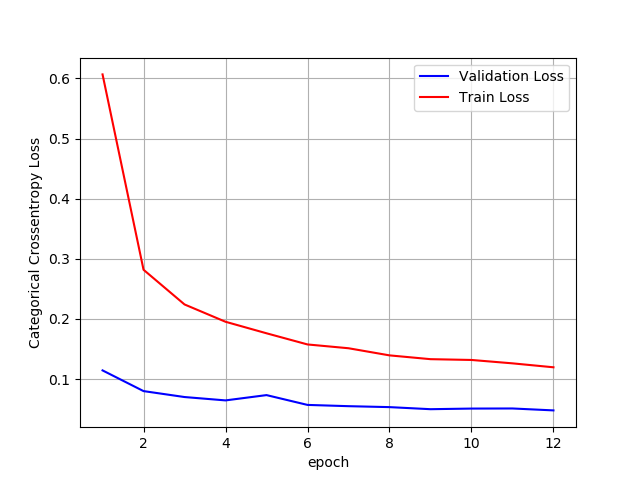

In [62]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.6% with kernel of size 2X2 with activation function relu and 7 convulutional layer

## B. With Dropout Rate, With Batch Normalization Layer,Without Max Pooling

In [64]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.55))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
batch_normalization_16 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
dropout_46 (Dropout)         (None, 27, 27, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 23328)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               2986112   
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1290      
Total para

In [65]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 250s 4ms/step - loss: 0.8615 - acc: 0.7262 - val_loss: 0.1926 - val_acc: 0.9469
Epoch 2/12
60000/60000 [==============================] - 247s 4ms/step - loss: 0.4328 - acc: 0.8708 - val_loss: 0.1826 - val_acc: 0.9496
Epoch 3/12
60000/60000 [==============================] - 246s 4ms/step - loss: 0.3616 - acc: 0.8943 - val_loss: 0.3882 - val_acc: 0.9570
Epoch 4/12
60000/60000 [==============================] - 247s 4ms/step - loss: 0.3277 - acc: 0.9037 - val_loss: 0.1441 - val_acc: 0.9673
Epoch 5/12
60000/60000 [==============================] - 252s 4ms/step - loss: 0.3092 - acc: 0.9096 - val_loss: 0.1292 - val_acc: 0.9670
Epoch 6/12
60000/60000 [==============================] - 249s 4ms/step - loss: 0.2969 - acc: 0.9137 - val_loss: 0.1094 - val_acc: 0.9710
Epoch 7/12
60000/60000 [==============================] - 246s 4ms/step - loss: 0.2917 - acc: 0.9160 - val_loss: 0.1511 - 

Test loss: 0.089475376578141
Test accuracy: 0.976


<IPython.core.display.Javascript object>


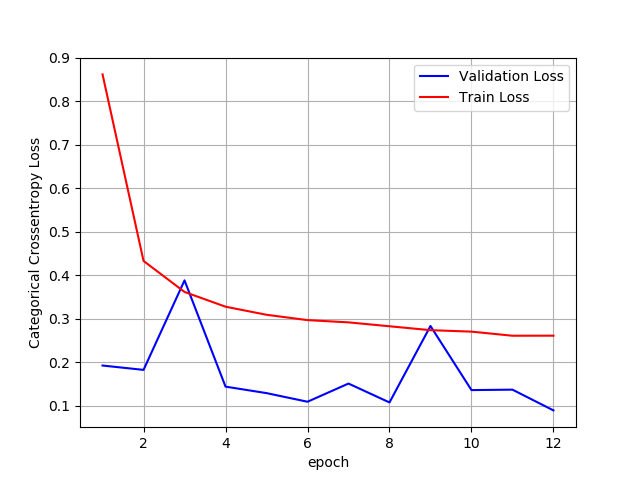

In [66]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 97.6% with kernel of size 2X2 with activation function relu and 7 convulutional layer, with dropout layer and batch normalization

## C. Without Dropout Rate, With Batch Normalization Layer,With Max Pooling

In [67]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (2, 2),padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 6, 6, 64)          16448     
__________

In [68]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.4895 - acc: 0.8416 - val_loss: 0.0797 - val_acc: 0.9764
Epoch 2/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2116 - acc: 0.9363 - val_loss: 0.0546 - val_acc: 0.9835
Epoch 3/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1594 - acc: 0.9529 - val_loss: 0.0404 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1324 - acc: 0.9603 - val_loss: 0.0481 - val_acc: 0.9858
Epoch 5/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1176 - acc: 0.9642 - val_loss: 0.0388 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1037 - acc: 0.9695 - val_loss: 0.0402 - val_acc: 0.9896
Epoch 7/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0919 - acc: 0.9720 - val_loss: 0.0366 - val_ac

Test loss: 0.037317679550556475
Test accuracy: 0.9913


<IPython.core.display.Javascript object>


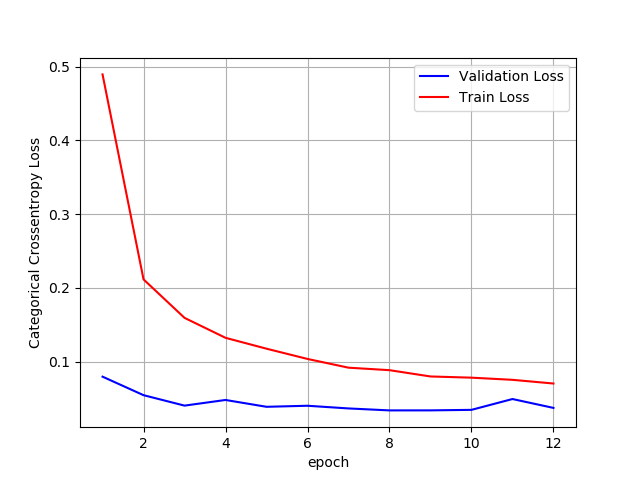

In [69]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 99.13% with kernel of size 2X2 with activation function relu and 7 convulutional layer, with batch normalization and dropout layer

## D. With Dropout Rate, Without Batch Normalization Layer,With Max Pooling

In [70]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

model.add(Conv2D(64, (2, 2),padding='same', activation='relu'))
model.add(Dropout(0.27))

model.add(Conv2D(64, (2, 2),padding='same', activation='relu'))
model.add(Dropout(0.48))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 13, 13, 64)        8256      
_________________________________________________________________
dropout_50 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 13, 13, 64)        16448     
_________________________________________________________________
dropout_51 (Dropout)         (None, 13, 13, 64)        0         
__________

In [71]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.7124 - acc: 0.7703 - val_loss: 0.1339 - val_acc: 0.9587
Epoch 2/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.3350 - acc: 0.9014 - val_loss: 0.0936 - val_acc: 0.9688
Epoch 3/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2635 - acc: 0.9232 - val_loss: 0.0767 - val_acc: 0.9764
Epoch 4/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2311 - acc: 0.9327 - val_loss: 0.0657 - val_acc: 0.9785
Epoch 5/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2139 - acc: 0.9388 - val_loss: 0.0571 - val_acc: 0.9827
Epoch 6/12
60000/60000 [==============================] - 126s 2ms/step - loss: 0.1957 - acc: 0.9448 - val_loss: 0.0523 - val_acc: 0.9827
Epoch 7/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1848 - acc: 0.9476 - val_loss: 0.0533 - 

Test loss: 0.053650017395289615
Test accuracy: 0.9839


<IPython.core.display.Javascript object>


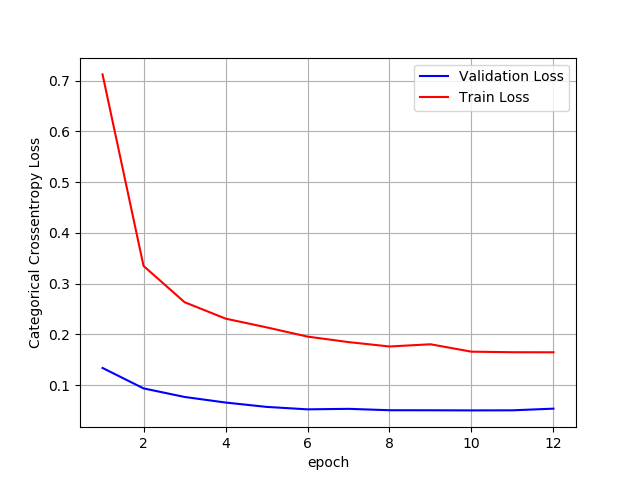

In [72]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.39% with kernel of size 2X2 with activation function relu and 7 convulutional layer, with dropout layer and max pooling

## E. With Dropout Rate, With Batch Normalization Layer,With Max Pooling

In [74]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(64, (2, 2),padding='same', activation='relu'))
model.add(Dropout(0.48))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_53 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 6, 6, 64)          256       
__________

In [75]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 111s 2ms/step - loss: 1.6212 - acc: 0.4252 - val_loss: 0.4155 - val_acc: 0.9102
Epoch 2/12
60000/60000 [==============================] - 113s 2ms/step - loss: 0.8427 - acc: 0.7160 - val_loss: 0.1673 - val_acc: 0.9548
Epoch 3/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.5819 - acc: 0.8124 - val_loss: 0.1088 - val_acc: 0.9665
Epoch 4/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.4543 - acc: 0.8572 - val_loss: 0.0886 - val_acc: 0.9746
Epoch 5/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3944 - acc: 0.8779 - val_loss: 0.0750 - val_acc: 0.9767
Epoch 6/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3493 - acc: 0.8966 - val_loss: 0.0683 - val_acc: 0.9790
Epoch 7/12
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3204 - acc: 0.9050 - val_loss: 0.0651 - 

Test loss: 0.05431345284801646
Test accuracy: 0.9846


<IPython.core.display.Javascript object>


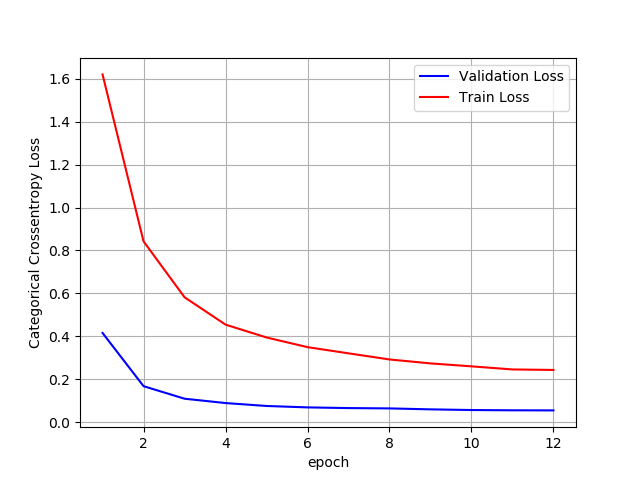

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Summary

#### We get a test accuracy of 98.46% with kernel of size 2X2 with activation function relu and 7 convulutional layer, with dropout layer, batch normalization, max pooling

## Pretty table

In [78]:
x = PrettyTable()

x.field_names = ["Model", "Dropout_Layer", "Batch_Normalization","Max-Pooling" "Accuracy"]
x.add_row(["MLP","No", "No","No" 98.6])
x.add_row(["MLP","Yes", "Yes","No", 97.6])
x.add_row(["MLP","No", "Yes","Yes" 99.13])
x.add_row(["MLP","Yes", "No","Yes", 98.39])
x.add_row(["MLP","Yes", "Yes","Yes", 98.46])
print(x)

SyntaxError: invalid syntax (<ipython-input-78-bd8cd5e1bc6d>, line 4)